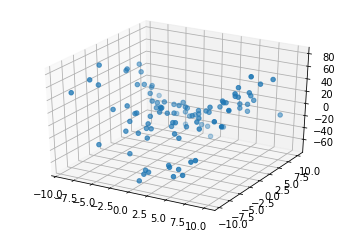

cost  1034.4774151544898
cost  18.72462930805992
cost  13.85538128968411
cost  12.753332934588979
cost  11.759503827485577
cost  11.16184218778999
cost  9.907364401707706
cost  9.657638778138889
cost  9.415714538178761
cost  8.594501287413719
cost  8.530228447733483
cost  7.691419779823996
cost  7.977705918343695
cost  7.672659731351903
cost  7.334937505014015
cost  7.219428430742872
cost  7.107233379142434
cost  7.020323341103408
cost  6.949690579167631
cost  6.8900865908531115
19307


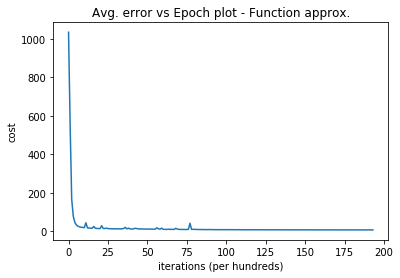

0.8552792135828777


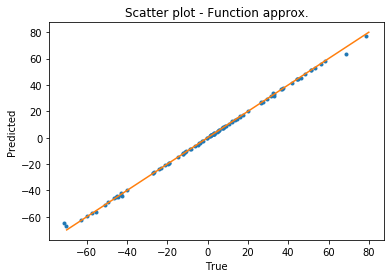

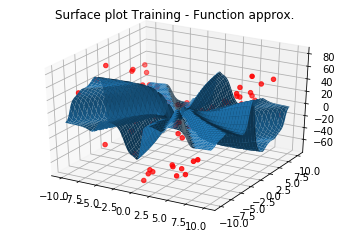

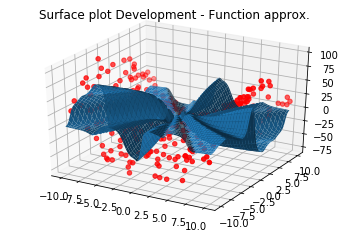

140.83650022646816


In [96]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

data=pd.read_csv('func/train100.txt',delimiter=' ',header=None)
txt = pd.DataFrame(data).to_numpy()

X_train = txt[:, :2]
Y_train = txt[:, 2]

# plot of given data
ax = plt.axes(projection='3d')
ax.scatter3D(txt[:,0],txt[:,1],txt[:,2])
plt.show()


# Parameters
lam=1
learning_rate=0.01
learning_Rate=0.01
num_iterations=30000
delta_cost = 1e-6
beta = 0.9
m=100


# Random initialization of weights
W1 = np.random.randn(30,2) *np.sqrt(2/2)
b1 = np.zeros(shape=(30, 1))
W2 = np.random.randn(10, 30) * np.sqrt(2/30)
b2 = np.zeros(shape=(10, 1))
W3 = np.random.randn(1, 10) *np.sqrt(2/10)
b3 = np.zeros(shape=(1, 1))

costs=[]
cost = 0

# initialisation of velocities
vW1=np.zeros_like(W1)
vW2=np.zeros_like(W2)
vW3=np.zeros_like(W3)
vb1=np.zeros_like(b1)
vb2=np.zeros_like(b2)
vb3=np.zeros_like(b3)

i = 0
while(True):
    
#   forward propagation
    Z1 = np.dot(W1, X_train.T) + b1
    A1 = np.tanh(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1])    
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])    
    Z3 = np.dot(W3, A2) + b3
    A3 = Z3
    
#   cost calculation   
    prev_cost = cost
    cost = (np.sum((Y_train-A3)**2)/m)+(lam* (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3))) / (2 * m))
    if i % 100 == 0:
            costs.append(cost)
    
#     backpropagation
    dZ3 = A3 - Y_train
    dW3 = (1 / m) * np.dot(dZ3, A2.T)+((lam * W3) / m)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.multiply(np.dot(W3.T, dZ3), 1 - np.power(A2, 2))
    dW2 = (1 / m) * np.dot(dZ2, A1.T)+((lam * W2) / m)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X_train)+((lam * W1) / m)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
#     update perameters
    vW1 = beta * vW1 + (1 - beta) * dW1
    vb1 = beta * vb1 + (1 - beta) * db1
    vW2 = beta * vW2 + (1 - beta) * dW2
    vb2 = beta * vb2 + (1 - beta) * db2
    vW3 = beta * vW3 + (1 - beta) * dW3
    vb3 = beta * vb3 + (1 - beta) * db3

    dW1 = vW1
    db1 = vb1
    dW2 = vW2
    db2 = vb2
    dW3 = vW3
    db3 = vb3

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    if(i%1000==0):
        print("cost ",cost)
    
    if(abs(prev_cost - cost) < delta_cost or i >= num_iterations):
        break
        
    i += 1
    
    


# Avg. error vs Epoch plot

print(i) 
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Avg. error vs Epoch plot - Function approx.")
plt.show()

# Checking Train on the Model

m=X_train.T.shape[1]

Z1 = np.dot(W1, X_train.T) + b1
# print(np.shape(Z1))
A1 = np.tanh(Z1)
D1 = np.random.rand(A1.shape[0], A1.shape[1])  
# print(np.shape(A1))
Z2 = np.dot(W2, A1) + b2
A2 = np.tanh(Z2)
D2 = np.random.rand(A2.shape[0], A2.shape[1])    
Z3 = np.dot(W3, A2) + b3
A3 = Z3
# print(np.shape(A3))
# print(A3)
    
cost = np.sum((Y_train.T-A3)**2)/m
print(cost)

# Scatter plot 

pred = A3.flatten()
plt.plot(Y_train,pred,".")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Scatter plot - Function approx.")
plt.plot([-70 , 80], [-70, 80])
plt.show()

# Surface plot

def plotting(x, y):
    p = np.array([[x,y]]).T
    #print(np.shape(p))
    #J1 = np.dot(W1, [[x],[y]]) + b1
    J1 = []
    for u in W1:
        val = u[0]*x + u[1]*y
        J1.append(val)
    J1 = np.array(J1)
    O1 = np.tanh(J1)
    #J2 = np.dot(W2, O1) + b2
    J2 = []
    for u in W2:
        val = 0
        for y in range(len(u)):
            val = val + O1[y]*u[y]
        J2.append(val)
    J2 = np.array(J2)
    O2 = np.tanh(J2) 
    #J3 = np.dot(W3, O2) + b3
    J3 = []
    for u in W3:
        val = 0
        for y in range(len(u)):
            val = val + O2[y]*u[y]
        J3.append(val)
    return J3[0]

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = plotting(X,Y)
ax = plt.axes(projection="3d")
ax.scatter3D(txt[:,0],txt[:,1],txt[:,2],c='r')
ax.plot_surface(X,Y,Z)
plt.title("Surface plot Training - Function approx.")
plt.show()

# Development Data

data=pd.read_csv('func/val.txt',delimiter=' ',header=None)

text = pd.DataFrame(data).to_numpy()

X_val = text[:, :2]
Y_val = text[:, 2]

# Surface Plot

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = plotting(X,Y)
ax = plt.axes(projection="3d")
ax.scatter3D(text[:,0],text[:,1],text[:,2],c='r')
ax.plot_surface(X,Y,Z)
plt.title("Surface plot Development - Function approx.")
plt.show()

# Working on Development data

m=X_val.T.shape[1]

Z1 = np.dot(W1, X_val.T) + b1
# print(np.shape(Z1))
A1 = np.tanh(Z1)
D1 = np.random.rand(A1.shape[0], A1.shape[1])  
# print(np.shape(A1))
Z2 = np.dot(W2, A1) + b2
A2 = np.tanh(Z2)
D2 = np.random.rand(A2.shape[0], A2.shape[1])    
Z3 = np.dot(W3, A2) + b3
A3 = Z3
# print(np.shape(A3))
# print(A3)
    
cost = np.sum((Y_val.T-A3)**2)/m
print(cost)

